In [17]:
from random import random
from numpy import load
from numpy import zeros
from numpy import ones
from numpy import asarray
from numpy.random import randint
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from matplotlib import pyplot
def load_real_samples(filename):
	# load the dataset
	data = load(filename)
	# unpack arrays
	X1, X2 = data['arr_0'], data['arr_1']
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]
A_data, B_data = load_real_samples('pmwtoir_256.npz')
print('Loaded', A_data.shape, B_data.shape)

Loaded (10, 256, 256, 3) (10, 256, 256, 3)


In [18]:
A_data, B_data = load_real_samples('pmwtoir_256.npz')
print('Loaded', A_data.shape, B_data.shape)# load dataset

Loaded (10, 256, 256, 3) (10, 256, 256, 3)


In [19]:
from keras.models import load_model
from numpy import load

# load the model
cust = {'InstanceNormalization': InstanceNormalization}
model_BtoA = load_model('g_model_BtoA_000010.h5', cust)
model_AtoB = load_model('g_model_AtoB_000010.h5', cust)

In [20]:
def select_sample(dataset, n_samples):
 # choose random instances
 ix = randint(0, dataset.shape[0], n_samples)
 # retrieve selected images
 print(ix)
 X = dataset[ix]
 return X

A_real = select_sample(B_data, 1)
B_generated  = model_BtoA.predict(A_real)
A_reconstructed = model_AtoB.predict(B_generated)
# A_real=cv2.cvtColor(A_real[0], cv2.COLOR_BGR2GRAY)
# B_generated = cv2.cvtColor(B_generated[0], cv2.COLOR_BGR2GRAY)
# A_reconstructed = cv2.cvtColor(A_reconstructed[0], cv2.COLOR_BGR2GRAY)
print(A_real.shape,B_generated.shape,A_reconstructed.shape)
print(A_real)

[8]
1/1 [==============================] - 2s 2s/step
(1, 256, 256, 3) (1, 256, 256, 3) (1, 256, 256, 3)
[[[[0.2        0.2        0.2       ]
   [0.23137255 0.23137255 0.23137255]
   [0.23137255 0.23137255 0.23137255]
   ...
   [0.19215686 0.19215686 0.19215686]
   [0.19215686 0.19215686 0.19215686]
   [0.19215686 0.19215686 0.19215686]]

  [[0.2        0.2        0.2       ]
   [0.23137255 0.23137255 0.23137255]
   [0.22352941 0.22352941 0.22352941]
   ...
   [0.19215686 0.19215686 0.19215686]
   [0.19215686 0.19215686 0.19215686]
   [0.19215686 0.19215686 0.19215686]]

  [[0.2        0.2        0.2       ]
   [0.23137255 0.23137255 0.23137255]
   [0.23137255 0.23137255 0.23137255]
   ...
   [0.19215686 0.19215686 0.19215686]
   [0.19215686 0.19215686 0.19215686]
   [0.19215686 0.19215686 0.19215686]]

  ...

  [[0.12941176 0.12941176 0.12941176]
   [0.14509804 0.14509804 0.14509804]
   [0.1372549  0.1372549  0.1372549 ]
   ...
   [0.17647059 0.17647059 0.17647059]
   [0.17647059 0.1

In [21]:
import numpy as np
import cv2
# A_real = A_real.astype(np.float32)
# A_real=cv2.cvtColor(A_real[0], cv2.COLOR_BGR2GRAY)
B_generated = cv2.cvtColor(B_generated[0], cv2.COLOR_BGR2GRAY)
A_reconstructed = cv2.cvtColor(A_reconstructed[0], cv2.COLOR_BGR2GRAY)
# A_real = A_real.reshape(256,256,1)
B_generated = B_generated.reshape(256,256,1)
A_reconstructed = A_reconstructed.reshape(256,256,1)
print(A_real.shape,B_generated.shape,A_reconstructed.shape)

(1, 256, 256, 3) (256, 256, 1) (256, 256, 1)


In [22]:
def show_plot(imagesX, imagesY1, imagesY2):
    images = vstack((imagesY1, imagesY2))
    titles = [ 'Generated', 'Reconstructed']
 # scale from [-1,1] to [0,1]
    imagesX=(imagesX[0] + 1) / 2.0
    images = (images + 1) / 2.0
 # plot images row by row
    pyplot.subplot(1, len(images), 1 + 0)
    pyplot.axis('off')
    pyplot.imshow(imagesX)
    pyplot.title("Real")
    for i in range(len(images)):
 # define subplot
        pyplot.subplot(1, len(images), 1 + i+1)
 # turn off axis
        pyplot.axis('off')
 # plot raw pixel data
        pyplot.imshow(images[i],cmap='gray')
 # title
        pyplot.title(titles[i])
    pyplot.show()

In [23]:
import cv2
from numpy import asarray
from numpy import vstack
print(B_generated.shape)
print(A_real)
# show_plot(A_real, B_generated, A_reconstructed)


(256, 256, 1)
[[[[0.2        0.2        0.2       ]
   [0.23137255 0.23137255 0.23137255]
   [0.23137255 0.23137255 0.23137255]
   ...
   [0.19215686 0.19215686 0.19215686]
   [0.19215686 0.19215686 0.19215686]
   [0.19215686 0.19215686 0.19215686]]

  [[0.2        0.2        0.2       ]
   [0.23137255 0.23137255 0.23137255]
   [0.22352941 0.22352941 0.22352941]
   ...
   [0.19215686 0.19215686 0.19215686]
   [0.19215686 0.19215686 0.19215686]
   [0.19215686 0.19215686 0.19215686]]

  [[0.2        0.2        0.2       ]
   [0.23137255 0.23137255 0.23137255]
   [0.23137255 0.23137255 0.23137255]
   ...
   [0.19215686 0.19215686 0.19215686]
   [0.19215686 0.19215686 0.19215686]
   [0.19215686 0.19215686 0.19215686]]

  ...

  [[0.12941176 0.12941176 0.12941176]
   [0.14509804 0.14509804 0.14509804]
   [0.1372549  0.1372549  0.1372549 ]
   ...
   [0.17647059 0.17647059 0.17647059]
   [0.17647059 0.17647059 0.17647059]
   [0.17647059 0.17647059 0.17647059]]

  [[0.12156863 0.12156863 0.121

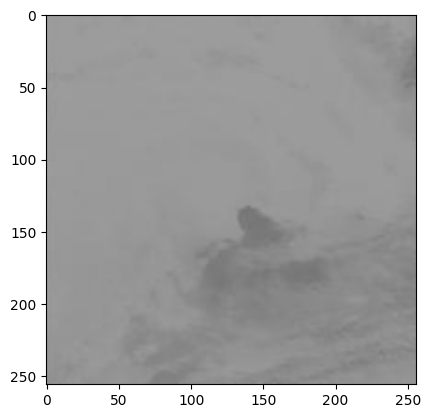

In [24]:
import matplotlib.pyplot as plt
imagesX=(A_real[0] + 1) / 2.0
plt.imshow(imagesX)

(256, 256, 1)


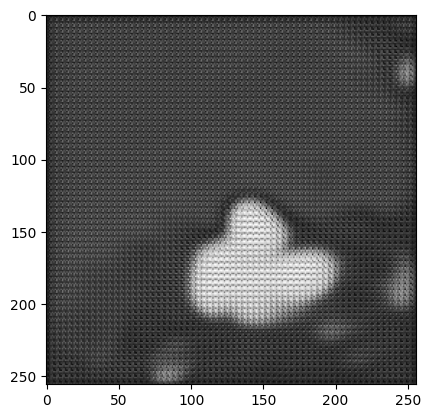

In [25]:
plt.imshow(B_generated,cmap='gray')
print(B_generated.shape)

(256, 256, 1)


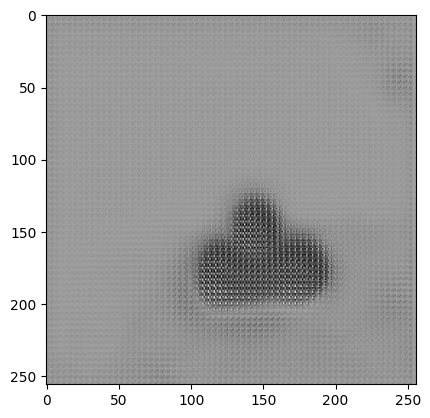

In [26]:
plt.imshow(A_reconstructed,cmap='gray')
print(A_reconstructed.shape)

In [27]:
from keras.models import load_model
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
cust = {'InstanceNormalization': InstanceNormalization}
model_AtoB = load_model('g_model_AtoB_000010.h5', cust)
model_BtoA = load_model('g_model_BtoA_000010.h5', cust)